In [5]:
!pip install fastai2

In [7]:
import fastai2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf

# Introduction

The goal of this app is to help distiguish between real and counterfeit Pokemon cards. Pokemon cards have become increasingly popular over the past few years, and with that the number of counterfeit cards has also increased. Even Walmart was recently in the news for selling fake Pokemon cards. With a large number of counterfeit cards being out in the world and with a large number of buyers, it can be very easy for a potential buyer to get ripped off. The goal of this app is to help any potential buyer to avoid buying counterfeit cards and wasting their money.

In [4]:
DATADIR = "pokemon_image_data/real_fake_split"
CATEGORIES = ["fake", "real"]

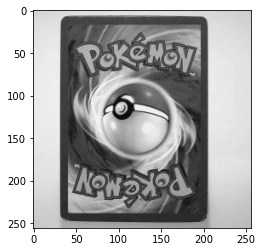

In [5]:
# testing the image import

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(256, 256)


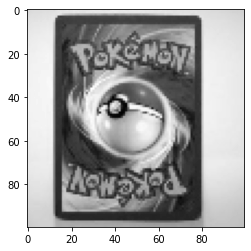

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
# image import

img_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_data.append([new_array, class_num])

In [9]:
print(len(img_data))

451


In [10]:
# shuffling the data so the model doesn't just learn based on order (ie 100 fake images in a row to start)
import random

random.shuffle(img_data)

In [11]:
X = []
y = []

for features, label in img_data:
    X.append(features)
    y.append(label)

In [12]:
# can't pass lists to Keras -> converting to an array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [13]:
X.shape

(451, 100, 100, 1)

In [14]:
y.shape

(451,)

In [15]:
X = X/255.0

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(f"The number of observations in training set is {X_train.shape[0]}")
print(f"The number of observations in test set is {X_test.shape[0]}")

The number of observations in training set is 360
The number of observations in test set is 91


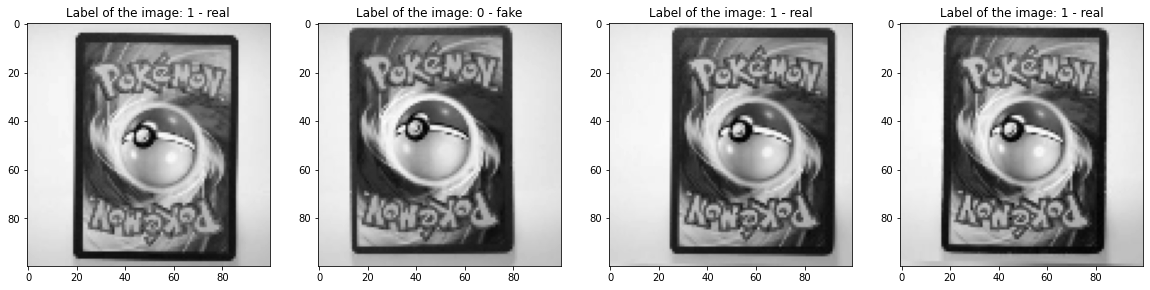

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[123]} - {CATEGORIES[y_train[123]]}")

plt.subplot(142)
plt.imshow(X_train[124].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[124]} - {CATEGORIES[y_train[124]]}")

plt.subplot(143)
plt.imshow(X_train[125].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[125]} - {CATEGORIES[y_train[125]]}")

plt.subplot(144)
plt.imshow(X_train[126].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[126]} - {CATEGORIES[y_train[126]]}")

plt.show()

In [18]:
DATADIR_AUG = "pokemon_image_data/augmented_real_fake_split"

In [19]:
img_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR_AUG, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_data.append([new_array, class_num])

In [20]:
print(len(img_data))

1579


In [21]:
X = []
y = []

for features, label in img_data:
    X.append(features)
    y.append(label)

In [22]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [23]:
X = X/255.0

In [24]:
X_train = np.concatenate((X_train, X))

In [25]:
y_train = np.concatenate((y_train, y))

In [26]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

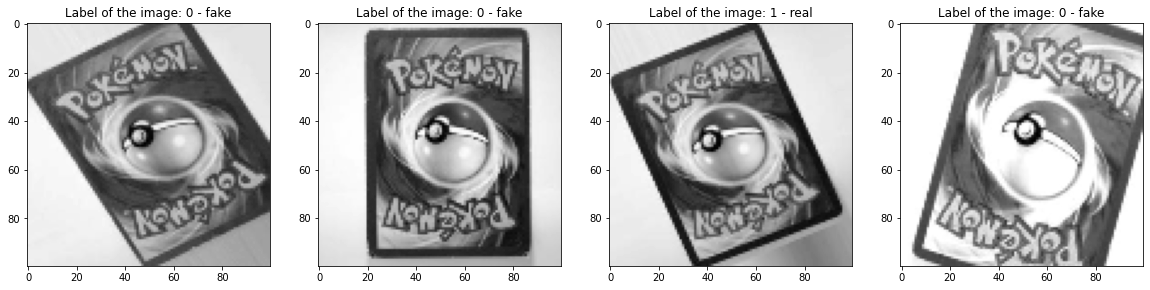

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[123]} - {CATEGORIES[y_train[123]]}")

plt.subplot(142)
plt.imshow(X_train[124].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[124]} - {CATEGORIES[y_train[124]]}")

plt.subplot(143)
plt.imshow(X_train[125].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[125]} - {CATEGORIES[y_train[125]]}")

plt.subplot(144)
plt.imshow(X_train[126].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[126]} - {CATEGORIES[y_train[126]]}")

plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [29]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
49/49 [==============================] - 14s 289ms/step - loss: 0.5990 - accuracy: 0.6821 - val_loss: 0.4894 - val_accuracy: 0.7552
Epoch 2/20
49/49 [==============================] - 14s 281ms/step - loss: 0.2974 - accuracy: 0.8801 - val_loss: 0.1680 - val_accuracy: 0.9536
Epoch 3/20
49/49 [==============================] - 14s 280ms/step - loss: 0.1277 - accuracy: 0.9600 - val_loss: 0.0786 - val_accuracy: 0.9742
Epoch 4/20
49/49 [==============================] - 16s 332ms/step - loss: 0.0934 - accuracy: 0.9716 - val_loss: 0.0659 - val_accuracy: 0.9794
Epoch 5/20
49/49 [==============================] - 14s 279ms/step - loss: 0.0709 - accuracy: 0.9761 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 6/20
49/49 [==============================] - 14s 278ms/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.0819 - val_accuracy: 0.9794
Epoch 7/20
49/49 [==============================] - 14s 280ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0749 - val_accuracy: 0.9716

In [30]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

Test score: 0.015406752936542034
Test accuracy: 0.9890109896659851


In [31]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/20
259/259 [==============================] - 20s 76ms/step - loss: 0.5817 - accuracy: 0.7028 - val_loss: 0.3834 - val_accuracy: 0.8170
Epoch 2/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1924 - accuracy: 0.9349 - val_loss: 0.1392 - val_accuracy: 0.9459
Epoch 3/20
259/259 [==============================] - 17s 66ms/step - loss: 0.0955 - accuracy: 0.9697 - val_loss: 0.1003 - val_accuracy: 0.9639
Epoch 4/20
259/259 [==============================] - 17s 66ms/step - loss: 0.0743 - accuracy: 0.9742 - val_loss: 0.0554 - val_accuracy: 0.9845
Epoch 5/20
259/259 [==============================] - 17s 67ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0406 - val_accuracy: 0.9871
Epoch 6/20
259/259 [==============================] - 18s 68ms/step - loss: 0.0332 - accuracy: 0.9877 - val_loss: 0.0609 - val_accuracy: 0.9820
Epoch 7/20
259/259 [==============================] - 18s 70ms/step - loss: 0.0274 - accuracy: 0.9897 - val_loss: 0.0272 - val_accuracy:

In [32]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/20
49/49 [==============================] - 14s 291ms/step - loss: 0.6027 - accuracy: 0.6860 - val_loss: 0.5073 - val_accuracy: 0.7474
Epoch 2/20
49/49 [==============================] - 14s 295ms/step - loss: 0.2853 - accuracy: 0.8878 - val_loss: 0.1209 - val_accuracy: 0.9562
Epoch 3/20
49/49 [==============================] - 14s 286ms/step - loss: 0.1259 - accuracy: 0.9613 - val_loss: 0.0829 - val_accuracy: 0.9691
Epoch 4/20
49/49 [==============================] - 14s 283ms/step - loss: 0.1159 - accuracy: 0.9632 - val_loss: 0.0724 - val_accuracy: 0.9716
Epoch 5/20
49/49 [==============================] - 14s 280ms/step - loss: 0.0905 - accuracy: 0.9742 - val_loss: 0.1267 - val_accuracy: 0.9562
Epoch 6/20
49/49 [==============================] - 14s 295ms/step - loss: 0.0849 - accuracy: 0.9710 - val_loss: 0.0637 - val_accuracy: 0.9820
Epoch 7/20
49/49 [==============================] - 15s 299ms/step - loss: 0.0698 - accuracy: 0.9755 - val_loss: 0.0498 - val_accuracy: 0.9871

In [33]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/20
49/49 [==============================] - 18s 366ms/step - loss: 0.6321 - accuracy: 0.6389 - val_loss: 0.5449 - val_accuracy: 0.7552
Epoch 2/20
49/49 [==============================] - 18s 363ms/step - loss: 0.2938 - accuracy: 0.8865 - val_loss: 0.2251 - val_accuracy: 0.9175
Epoch 3/20
49/49 [==============================] - 17s 351ms/step - loss: 0.1476 - accuracy: 0.9549 - val_loss: 0.1322 - val_accuracy: 0.9562
Epoch 4/20
49/49 [==============================] - 17s 346ms/step - loss: 0.1225 - accuracy: 0.9600 - val_loss: 0.1325 - val_accuracy: 0.9459
Epoch 5/20
49/49 [==============================] - 17s 348ms/step - loss: 0.0959 - accuracy: 0.9716 - val_loss: 0.0898 - val_accuracy: 0.9716
Epoch 6/20
49/49 [==============================] - 17s 344ms/step - loss: 0.0716 - accuracy: 0.9787 - val_loss: 0.0981 - val_accuracy: 0.9665
Epoch 7/20
49/49 [==============================] - 17s 347ms/step - loss: 0.0708 - accuracy: 0.9761 - val_loss: 0.1505 - val_accuracy: 0.9304

In [34]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [35]:
# NAME = f'Pokemon_cards_model2_{int(time.time())}'

# tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

In [36]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/20
259/259 [==============================] - 21s 80ms/step - loss: 0.4988 - accuracy: 0.7582 - val_loss: 0.1983 - val_accuracy: 0.9407
Epoch 2/20
259/259 [==============================] - 20s 76ms/step - loss: 0.1564 - accuracy: 0.9471 - val_loss: 0.2111 - val_accuracy: 0.9227
Epoch 3/20
259/259 [==============================] - 20s 76ms/step - loss: 0.1066 - accuracy: 0.9645 - val_loss: 0.0897 - val_accuracy: 0.9639
Epoch 4/20
259/259 [==============================] - 19s 75ms/step - loss: 0.0860 - accuracy: 0.9736 - val_loss: 0.0674 - val_accuracy: 0.9639
Epoch 5/20
259/259 [==============================] - 20s 76ms/step - loss: 0.0472 - accuracy: 0.9819 - val_loss: 0.0555 - val_accuracy: 0.9742
Epoch 6/20
259/259 [==============================] - 19s 75ms/step - loss: 0.0398 - accuracy: 0.9813 - val_loss: 0.0582 - val_accuracy: 0.9794
Epoch 7/20
259/259 [==============================] - 20s 75ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0399 - val_accuracy:

In [37]:
# #looking at various parameters in tensorboard

# dense_layers = [0, 1, 2]
# layer_sizes = [32, 64, 128]
# conv_layers = [1, 2, 3]

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:
#         for conv_layer in conv_layers:
#             NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
#             print(NAME)
            
#             tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
            
#             model = Sequential()
#             model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
#             model.add(Activation("relu"))
#             model.add(MaxPooling2D(pool_size=(2,2)))
            
#             for l in range(conv_layer-1):
#                 model.add(Conv2D(layer_size, (3,3)))
#                 model.add(Activation("relu"))
#                 model.add(MaxPooling2D(pool_size=(2,2)))
                
#             model.add(Flatten())

#             for l in range(dense_layer):
#                 model.add(Dense(layer_size))
#                 model.add(Activation("relu"))

#             model.add(Dense(1))
#             model.add(Activation('sigmoid'))

#             model.compile(loss='binary_crossentropy',
#                          optimizer='adam',
#                          metrics=['accuracy'])

#             model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

#             score = model.evaluate(X_test, y_test, verbose=0)
#             print('Test score:', score[0])
#             print('Test accuracy:', score[1])

1-conv-32-nodes-0-dense-1649094873
Epoch 1/20
259/259 [==============================] - 6s 24ms/step - loss: 0.6074 - accuracy: 0.7228 - val_loss: 0.4770 - val_accuracy: 0.7706
Epoch 2/20
259/259 [==============================] - 5s 21ms/step - loss: 0.3517 - accuracy: 0.8594 - val_loss: 0.3645 - val_accuracy: 0.8325
Epoch 3/20
259/259 [==============================] - 6s 22ms/step - loss: 0.2287 - accuracy: 0.9233 - val_loss: 0.2906 - val_accuracy: 0.8918
Epoch 4/20
259/259 [==============================] - 5s 21ms/step - loss: 0.1408 - accuracy: 0.9665 - val_loss: 0.2247 - val_accuracy: 0.9098
Epoch 5/20
259/259 [==============================] - 5s 21ms/step - loss: 0.0923 - accuracy: 0.9839 - val_loss: 0.2186 - val_accuracy: 0.9201
Epoch 6/20
259/259 [==============================] - 5s 21ms/step - loss: 0.0551 - accuracy: 0.9910 - val_loss: 0.1710 - val_accuracy: 0.9356
Epoch 7/20
259/259 [==============================] - 6s 21ms/step - loss: 0.0439 - accuracy: 0.9923 - val_

259/259 [==============================] - 20s 75ms/step - loss: 0.0449 - accuracy: 0.9819 - val_loss: 0.1192 - val_accuracy: 0.9562
Epoch 11/20
259/259 [==============================] - 20s 77ms/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0233 - val_accuracy: 0.9948
Epoch 12/20
259/259 [==============================] - 19s 75ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0329 - val_accuracy: 0.9845
Epoch 13/20
259/259 [==============================] - 20s 76ms/step - loss: 0.0225 - accuracy: 0.9910 - val_loss: 0.0256 - val_accuracy: 0.9897
Epoch 14/20
259/259 [==============================] - 20s 79ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0087 - val_accuracy: 0.9974
Epoch 15/20
259/259 [==============================] - 20s 76ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.0080 - val_accuracy: 0.9974
Epoch 16/20
259/259 [==============================] - 20s 76ms/step - loss: 0.0402 - accuracy: 0.9845 - val_loss: 0.0208 - val_accuracy: 0.99

259/259 [==============================] - 11s 41ms/step - loss: 1.4739e-04 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9845
Epoch 20/20
259/259 [==============================] - 11s 41ms/step - loss: 1.3030e-04 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9948
Test score: 0.0009435081155970693
Test accuracy: 1.0
3-conv-32-nodes-1-dense-1649098877
Epoch 1/20
259/259 [==============================] - 12s 47ms/step - loss: 0.5788 - accuracy: 0.6950 - val_loss: 0.3865 - val_accuracy: 0.8222
Epoch 2/20
259/259 [==============================] - 10s 39ms/step - loss: 0.2120 - accuracy: 0.9297 - val_loss: 0.0979 - val_accuracy: 0.9588
Epoch 3/20
259/259 [==============================] - 10s 38ms/step - loss: 0.1364 - accuracy: 0.9549 - val_loss: 0.2374 - val_accuracy: 0.9046
Epoch 4/20
259/259 [==============================] - 11s 41ms/step - loss: 0.1164 - accuracy: 0.9587 - val_loss: 0.1099 - val_accuracy: 0.9588
Epoch 5/20
259/259 [==============================

259/259 [==============================] - 52s 201ms/step - loss: 0.0526 - accuracy: 0.9826 - val_loss: 0.0502 - val_accuracy: 0.9768
Epoch 8/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0386 - val_accuracy: 0.9923
Epoch 9/20
259/259 [==============================] - 52s 200ms/step - loss: 0.0307 - accuracy: 0.9877 - val_loss: 0.0787 - val_accuracy: 0.9742
Epoch 10/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.1173 - val_accuracy: 0.9665
Epoch 11/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0361 - accuracy: 0.9858 - val_loss: 0.0434 - val_accuracy: 0.9820
Epoch 12/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.1062 - val_accuracy: 0.9613
Epoch 13/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0693 - val_accuracy:

Epoch 1/20
259/259 [==============================] - 15s 58ms/step - loss: 0.5189 - accuracy: 0.7344 - val_loss: 0.2539 - val_accuracy: 0.9098
Epoch 2/20
259/259 [==============================] - 13s 51ms/step - loss: 0.1740 - accuracy: 0.9400 - val_loss: 0.1086 - val_accuracy: 0.9639
Epoch 3/20
259/259 [==============================] - 13s 50ms/step - loss: 0.1144 - accuracy: 0.9684 - val_loss: 0.0867 - val_accuracy: 0.9768
Epoch 4/20
259/259 [==============================] - 14s 52ms/step - loss: 0.0749 - accuracy: 0.9736 - val_loss: 0.0505 - val_accuracy: 0.9768
Epoch 5/20
259/259 [==============================] - 13s 50ms/step - loss: 0.0575 - accuracy: 0.9794 - val_loss: 0.0448 - val_accuracy: 0.9871
Epoch 6/20
259/259 [==============================] - 13s 51ms/step - loss: 0.0361 - accuracy: 0.9903 - val_loss: 0.0730 - val_accuracy: 0.9665
Epoch 7/20
259/259 [==============================] - 14s 53ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.0290 - val_accuracy:

Epoch 16/20
259/259 [==============================] - 19s 74ms/step - loss: 2.7622e-05 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9459
Epoch 17/20
259/259 [==============================] - 19s 74ms/step - loss: 2.2494e-05 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 0.9485
Epoch 18/20
259/259 [==============================] - 19s 74ms/step - loss: 1.8398e-05 - accuracy: 1.0000 - val_loss: 0.1829 - val_accuracy: 0.9485
Epoch 19/20
259/259 [==============================] - 19s 75ms/step - loss: 1.5139e-05 - accuracy: 1.0000 - val_loss: 0.1866 - val_accuracy: 0.9485
Epoch 20/20
259/259 [==============================] - 19s 74ms/step - loss: 1.2675e-05 - accuracy: 1.0000 - val_loss: 0.1920 - val_accuracy: 0.9485
Test score: 0.00023761593911331147
Test accuracy: 1.0
2-conv-64-nodes-2-dense-1649104741
Epoch 1/20
259/259 [==============================] - 24s 91ms/step - loss: 0.4122 - accuracy: 0.8059 - val_loss: 0.1956 - val_accuracy: 0.9562
Epoch 2/20
259/259 [==

In [38]:
from IPython import display
from base64 import b64decode

In [56]:
# the parameters below were found to be the best from the tensorboard plots from above
dense_layers = [1]
layer_sizes = [128]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
            print(NAME)
            
            tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
            
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
                
            model.add(Flatten())

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

            model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

            score = model.evaluate(X_test, y_test, verbose=0)
            print('Test score:', score[0])
            print('Test accuracy:', score[1])

3-conv-128-nodes-1-dense-1649110335
Epoch 1/20
259/259 [==============================] - 58s 225ms/step - loss: 0.4401 - accuracy: 0.7556 - val_loss: 0.1490 - val_accuracy: 0.9485
Epoch 2/20
259/259 [==============================] - 46s 179ms/step - loss: 0.1440 - accuracy: 0.9504 - val_loss: 0.1567 - val_accuracy: 0.9330
Epoch 3/20
259/259 [==============================] - 48s 184ms/step - loss: 0.1737 - accuracy: 0.9439 - val_loss: 0.0959 - val_accuracy: 0.9588
Epoch 4/20
259/259 [==============================] - 45s 175ms/step - loss: 0.0901 - accuracy: 0.9671 - val_loss: 0.0833 - val_accuracy: 0.9691
Epoch 5/20
259/259 [==============================] - 49s 189ms/step - loss: 0.0711 - accuracy: 0.9755 - val_loss: 0.0904 - val_accuracy: 0.9691
Epoch 6/20
259/259 [==============================] - 44s 171ms/step - loss: 0.0550 - accuracy: 0.9761 - val_loss: 0.0909 - val_accuracy: 0.9639
Epoch 7/20
259/259 [==============================] - 46s 177ms/step - loss: 0.0608 - accuracy

In [507]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array = new_array / 255.0
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [510]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/google_img_1.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[0.7948471]]
real


In [489]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/flipsidegaming_fake.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[0.02629305]]
fake


In [511]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/reddit_card.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[1.]]
real


In [3]:
import ipywidgets as widgets
from ipywidgets import VBox
from IPython.display import display
import fastbook
fastbook.setup_book()
from fastbook import *

C:\Users\mattd\anaconda3\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [509]:
def prep_image_upload(image):
    img_array = np.asarray(image)
    gray = cv2.cvtColor(np.float32(img_array), cv2.COLOR_BGR2GRAY)
    new_array = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    new_array = new_array / 255.0
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [456]:
# btn_upload = widgets.FileUpload()
# btn_upload

In [457]:
# img = PILImage.create(btn_upload.data[-1])
# img

In [458]:
# prediction = model.predict([prep_image_upload(img)])
# print(prediction)
# index = int(round(prediction[0][0]))
# print(CATEGORIES[index])

In [498]:
output = widgets.Output()
output.clear_output()
# output

In [500]:
# with output:
#     display(img.to_thumb(300, 300))

In [501]:
label_pred = widgets.Label()
label_pred.value = 'Please upload a card'
# label_pred

In [502]:
run_button = widgets.Button(description='Run!')
# run_button

In [503]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    output.clear_output()
    with output:
        display(img.to_thumb(300, 300))
    pred_prob = model.predict([prep_image_upload(img)])
    index = int(round(pred_prob[0][0]))
    pred_value = CATEGORIES[index]
    pred_prob = pred_prob[0][0]
    if index == 0:
        pred_prob = 1 - pred_prob
    label_pred.value = f'Prediction: {pred_value}; Probability the card is {pred_value}: {pred_prob:.2%}'
    
run_button.on_click(on_click_classify)

In [504]:
btn_upload = widgets.FileUpload()

In [505]:
VBox([widgets.Label('Upload a card!'),
     btn_upload, run_button, output, label_pred])

In [513]:
# !pip install voila
# !jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: C:\Users\mattd\anaconda3\etc\jupyter
    - Validating...
      voila 0.3.5 ok
